# I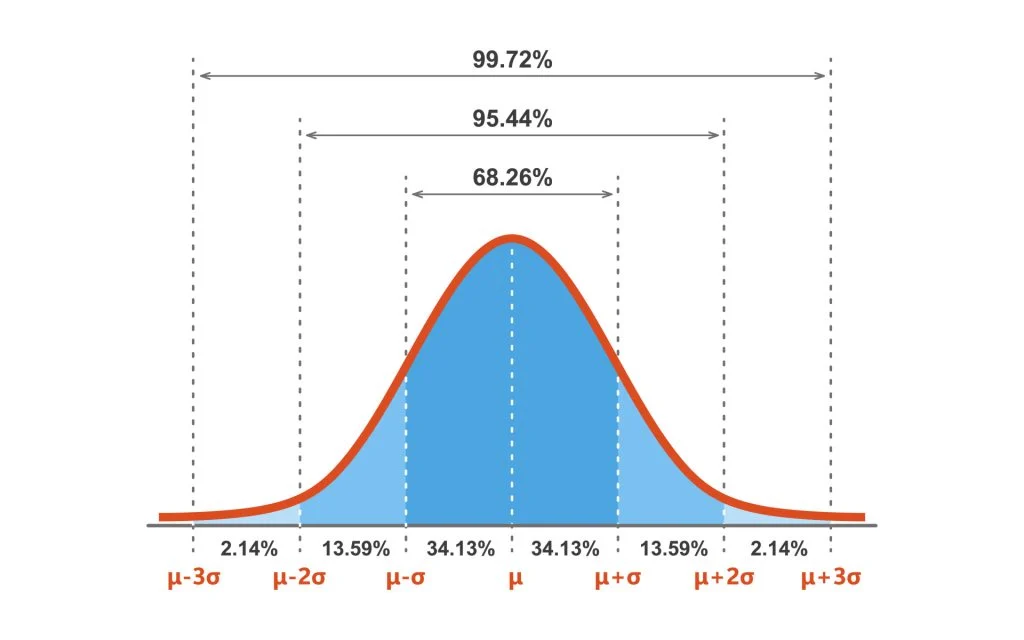mport library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [3]:
fake_transaction = pd.read_csv('fake_transactional_data_24.csv')

# EDA

In [4]:
fake_transaction.sort_values('from_totally_fake_account')

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
1523421,1000.0,43.67,TAKEAWAY_CURRY,24/02/2025
2903139,1000.0,2.25,A_CAFE,15/04/2025
533709,1000.0,10.50,LOCAL_WATERING_HOLE,19/01/2025
533710,1000.0,5.50,50340,19/01/2025
533711,1000.0,10.50,LOCAL_WATERING_HOLE,19/01/2025
...,...,...,...,...
2139815,100988.0,2.45,A_CAFE,19/03/2025
3228280,100988.0,4.50,67962,27/04/2025
2139814,100988.0,48.78,LOCAL_PUB,19/03/2025
716646,100988.0,9.00,31303,26/01/2025


In [5]:
# check data types
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224972 entries, 0 to 5224971
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 159.5+ MB


In [9]:
# convert 'not_happened_yet_date' column (object type) to datetime type
fake_transaction['not_happened_yet_date'] = pd.to_datetime(fake_transaction['not_happened_yet_date'], format='%d/%m/%Y')
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224972 entries, 0 to 5224971
Data columns (total 5 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      float64       
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
 4   transaction_month              int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 199.3+ MB


 ## find average money spend by month from each account

In [10]:
# extract month from the 'not_happened_yet_date' column
fake_transaction['transaction_month'] = fake_transaction['not_happened_yet_date'].dt.month

# group by month and calculate the average transaction amount
average_amount_by_month = fake_transaction.groupby(['from_totally_fake_account', 'transaction_month'])['monopoly_money_amount'].mean()

print(average_amount_by_month)

from_totally_fake_account  transaction_month
1000.0                     1                    17.769103
                           2                    18.838758
                           3                    14.192364
                           4                    14.217955
                           5                    16.312301
                                                  ...    
100988.0                   3                    16.915532
                           4                    13.924044
                           5                    16.232396
                           6                    13.764375
                           7                     8.960333
Name: monopoly_money_amount, Length: 56994, dtype: float64


 ## Scatter plot of sample dataset in order to see the money trend from particular account

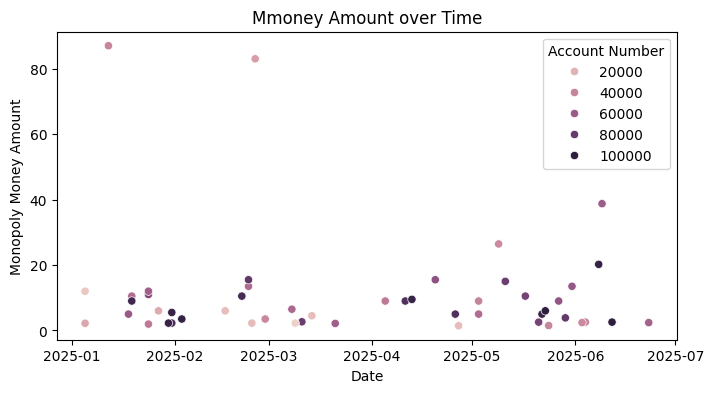

In [16]:
# sample a subset of the data for plotting
sampled_data = fake_transaction.sample(n=50, random_state = 10)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sampled_data)
plt.title('Mmoney Amount over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account Number')
plt.show()

Some account such as Account Number 40000 has abnormal spending in 2025-01 and also 2025-03, it migh be fraund or ,marketing campaign in that month

 ## Line Plot (same as above)

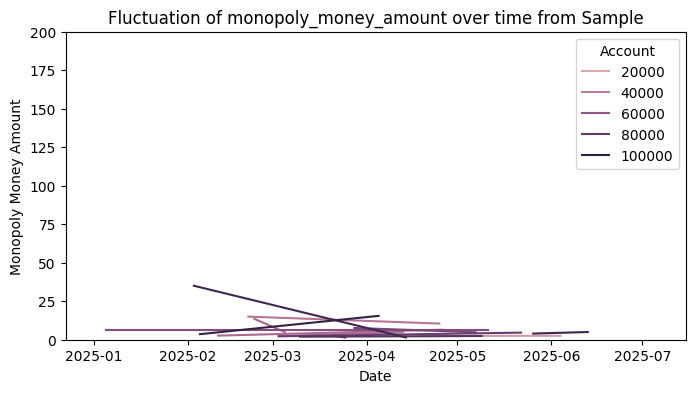

In [18]:
# sample a subset of data for plotting line graph
sampled_data = fake_transaction.sample(n=500, random_state = 10)

plt.figure(figsize=(8, 4))
sns.lineplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sampled_data, markers=True)
plt.title('Fluctuation of monopoly_money_amount over time from Sample')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account')
plt.ylim(0,200)
plt.show()

very unclear, but various line are flat, which mean the trend of spending money has no change in each account.


 ## z-score for anomaly detection (detect extreme data by examining the tails)

![Alt text](/content/image.png)

In [20]:
# calculate mean and standard deviation
mean_amount = fake_transaction['monopoly_money_amount'].mean()
std_amount = fake_transaction['monopoly_money_amount'].std()

# calculate z-scores
fake_transaction['z_score'] = (fake_transaction['monopoly_money_amount'] - mean_amount) / std_amount

# set threshold for anomaly detection
threshold = 3

# detect anomalies based on the threshold
anomalies = fake_transaction[abs(fake_transaction['z_score']) > threshold]

print(anomalies)


         from_totally_fake_account  monopoly_money_amount  \
11405                      62014.0                 290.00   
15281                       3512.0                1970.00   
15282                      18041.0                 440.00   
15545                      37827.0                 302.00   
15546                      91561.0                 302.00   
...                            ...                    ...   
5222156                    35212.0                 415.00   
5222164                    83934.0                1520.00   
5222165                    81637.0                 651.67   
5223042                    42040.0                 825.00   
5224005                    70037.0                 292.00   

        to_randomly_generated_account not_happened_yet_date  \
11405        HIPSTER_ELECTRONICS_SHOP            2025-01-01   
15281                           43151            2025-01-01   
15282                           68829            2025-01-01   
15545          

Anomaly Account

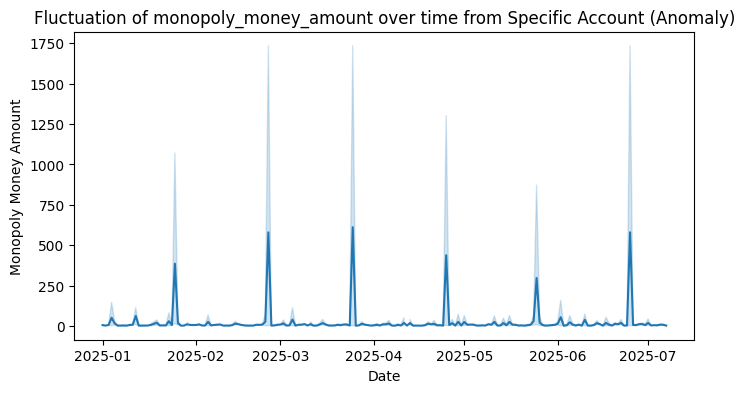

In [27]:
# a specific account from anomalies
specific_account_data = fake_transaction[fake_transaction['from_totally_fake_account'] == 11405]

plt.figure(figsize=(8, 4))
sns.lineplot(x='not_happened_yet_date', y='monopoly_money_amount', data=specific_account_data)
plt.title('Fluctuation of monopoly_money_amount over time from Specific Account (Anomaly)')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()


Normal Account

In [25]:
# calculate mean and standard deviation
mean_amount = fake_transaction['monopoly_money_amount'].mean()
std_amount = fake_transaction['monopoly_money_amount'].std()

# calculate z-scores
fake_transaction['z_score'] = (fake_transaction['monopoly_money_amount'] - mean_amount) / std_amount

# set threshold for anomaly detection
threshold = 3

# detect anomalies based on the threshold
normal = fake_transaction[abs(fake_transaction['z_score']) < threshold]
normal.head()


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,z_score
0,10371.0,4.00,CINEMA,2025-01-01,1,-0.164745
1,88339.0,2.40,40544,2025-01-01,1,-0.183189
2,18555.0,2.40,85149,2025-01-01,1,-0.183189
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,-0.163592
4,80792.0,1.95,18555,2025-01-01,1,-0.188376


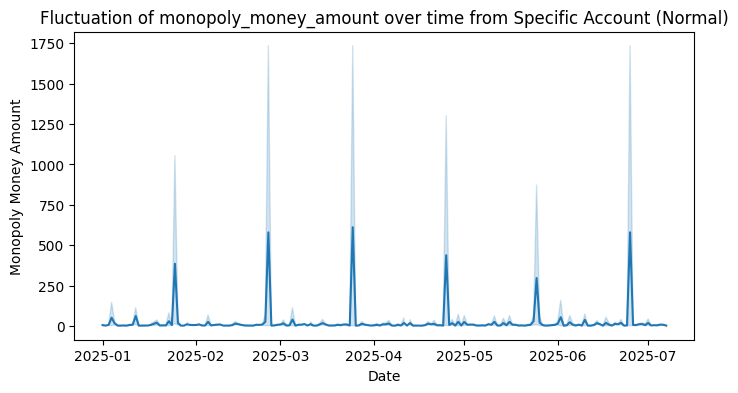

In [28]:
# a specific account from normal account
specific_account_data = fake_transaction[fake_transaction['from_totally_fake_account'] == 11405]

plt.figure(figsize=(8, 4))
sns.lineplot(x='not_happened_yet_date', y='monopoly_money_amount', data=specific_account_data)
plt.title('Fluctuation of monopoly_money_amount over time from Specific Account (Normal)')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()


When using eye, both graph from normal account and anomaly account seems not different